In [1]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [2]:
import keras.backend as K
from keras.models import Sequential
from keras.layers.core import Dense, Activation, Dropout
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras.layers import Flatten
from keras.utils.np_utils import to_categorical
from keras.constraints import maxnorm
from keras.optimizers import RMSprop, SGD
from keras.constraints import maxnorm

Using Theano backend.


In [3]:
data_set = np.loadtxt('digits/dataset.csv', delimiter=',', dtype=np.uint8)

In [4]:
np.random.shuffle(data_set)
Y = data_set[:,:1].astype('uint8')
X = data_set[:,1:].reshape(data_set.shape[0],900)

In [5]:
trainset_num = int(len(X) * 0.7) # classical split 70/30

X_train = X[:trainset_num]
# X_train = X_train.astype('float32')
X_train = X_train/255

X_test = X[trainset_num:]
# X_test = X_test.astype('float32')
X_test = X_test/255

In [6]:
classes_num = 10

Y_train = Y[:trainset_num]
Y_train = to_categorical(Y_train, classes_num)

Y_test = Y[trainset_num:]
Y_test = to_categorical(Y_test, classes_num)

Отображаем часть картинок с номерами классов.

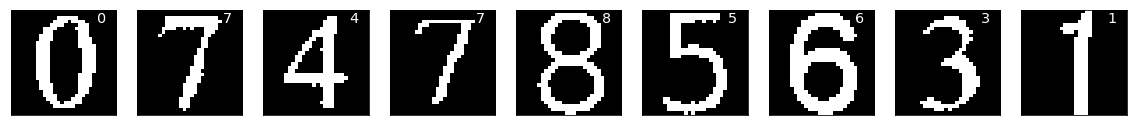

In [7]:
images_n_to_display = 9
sample_images = X_train[:images_n_to_display].reshape((images_n_to_display,30,30))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary_r)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,np.argmax(Y_train[i]), color='white', size='x-large')


In [30]:


model = Sequential()

model.add(Dense(512, input_dim=900, activation=K.relu))
model.add(Dense(10, activation='softmax'))
model.compile(optimizer='rmsprop',
              loss='categorical_crossentropy',
              metrics=['accuracy'])

# data = np.random.random((793, 900))
# labels = np.random.randint(10, size=(793, 10))
# data = np.random.random((1000, 100))
# labels = np.random.randint(2, size=(1000, 1))

data = np.random.random((1000, 100))
labels = np.random.randint(10, size=(1000, 1))

# Convert labels to categorical one-hot encoding
one_hot_labels = to_categorical(labels, num_classes=10)

# Train the model, iterating on the data in batches of 32 samples
model.fit(X_train, Y_train, epochs=10, batch_size=32)

Epoch 1/10
793/793 [==============================] - 0s - loss: 0.4148 - acc: 0.8764      
Epoch 2/10
793/793 [==============================] - 0s - loss: 0.0744 - acc: 0.9798     
Epoch 3/10
793/793 [==============================] - 0s - loss: 0.0237 - acc: 0.9924     
Epoch 4/10
793/793 [==============================] - 0s - loss: 0.0204 - acc: 0.9937     
Epoch 5/10
793/793 [==============================] - 0s - loss: 0.0230 - acc: 0.9962     
Epoch 6/10
793/793 [==============================] - 0s - loss: 0.0012 - acc: 1.0000     
Epoch 7/10
793/793 [==============================] - 0s - loss: 0.0014 - acc: 1.0000         
Epoch 8/10
793/793 [==============================] - 0s - loss: 0.0291 - acc: 0.9937      
Epoch 9/10
793/793 [==============================] - 0s - loss: 1.9054e-04 - acc: 1.0000     
Epoch 10/10
793/793 [==============================] - 0s - loss: 8.2418e-04 - acc: 1.0000     


In [31]:
(loss, score) = model.evaluate(X_test, Y_test)

 32/341 [=>............................] - ETA: 0s

In [32]:
loss

0.032591179472085667

In [33]:
score

0.99120234621584935

In [35]:
model_prediction = model.predict_classes(X_test)
true_classes = np.argmax(Y_test, 1)
error_indexes = np.argwhere(model_prediction - true_classes)

 32/341 [=>............................] - ETA: 0s

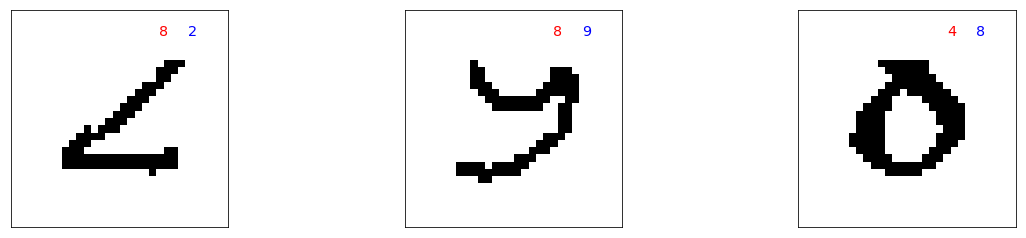

In [38]:
images_n_to_display = 3

image_indexes = error_indexes[:images_n_to_display].reshape(images_n_to_display)

sample_images = X_test[image_indexes].reshape((images_n_to_display,30,30))

fig, axes = plt.subplots(ncols=images_n_to_display)
fig.set_figwidth(20)

for i in range(images_n_to_display):
    axes[i].imshow(sample_images[i], cmap=plt.cm.binary)
    axes[i].set_xticks(())
    axes[i].set_yticks(())
    axes[i].text(24,3,true_classes[image_indexes[i]], color='blue', size='x-large')
    axes[i].text(20,3,model_prediction[image_indexes[i]], color='red', size='x-large')

In [37]:
print(error_indexes)

[[ 84]
 [135]
 [331]]
